<a href="https://colab.research.google.com/github/YuruHuang/deep-learning-menu-healthiness/blob/main/01_Menu_Healthiness_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a notebook for developing menu healthiness prediction models. In this notebook, I will conduct the following experiments👩🏻‍🍳, using `rest_name` only!

* **Model 0** (Machine Learning Model): Baseline model with only `rest_name` (Support Vector Regression, tf-idf)
* **Model 1** (Deep Learning Model): LSTM model with word level tokenization 
* **Model 2** (Deep Learning Model): LSTM model with character level tokenization 
* **Model 3** (Deep Learning Model): GRU model with word level tokenization 
* **Model 4** (Deep Learning Model): GRU model with character level tokenization 
* **Model 5** (Deep Learning Model): CNN model with word level tokenization 
* **Model 6** (Deep Learning Model): GRU model with word level tokenization, added food hygiene rating
* **Model 7** (Deep Learning Model): GRU model with character level tokenization, added food hygiene rating 
* **Model 8** (Deep Learning Model): GRU model with character level tokenization, added food hygiene rating, and changed the activation function




## Data Preprocessing 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
justeat_menu = pd.read_csv('JustEat_extracted_211021.csv')
justeat_menu.head()

,Restaurant ID,Desserts,Vegetables,Salads,Chips,Water,Milk,Special Offers,rest_name,n_reviews,average_review,item_price_mean,item_price_median,n_items,url,cuisine,address,postcode,postcode_district,specialOffers,chips,salads,predict,rating2,review
0,80603,0,5,2,11,1,0,5,Pasha Kebabs & Pizzas,View 551 reviews,5.06 stars out of 6.,6.037634,7.000,93,URL,"Kebab,Pizza,Halal","25 Windmill Brae, Aberdeen, AB11 6HU",AB11 6HU,AB11,5,11,2,5.504342,1,551.0
1,71703,7,10,2,14,0,0,4,Paco's Tacos,View 2314 reviews,4.65 stars out of 6.,5.431358,4.450,162,URL,"Mexican,American","42-44 Market Street, Aberdeenshire, AB11 5PL",AB11 5PL,AB11,4,14,2,5.010865,0,2314.0
2,6885,0,16,12,1,0,0,2,Dil Se,View 1392 reviews,5.19 stars out of 6.,7.473418,8.225,158,URL,"Indian,Curry","Unit 8, The Green Berrymuir Road, Portlethen, ...",AB12 4UN,AB12,2,1,12,9.355489,4,1392.0
3,122605,5,10,6,44,0,0,1,Mannofield Pizza Grill and Kebab,View 386 reviews,5.16 stars out of 6.,8.069737,7.700,152,URL,"Pizza,Kebab","483a Great Western Road, Aberdeen, AB10 6NN",AB10 6NN,AB10,1,15,6,5.642945,1,386.0
4,44832,0,16,2,1,0,0,2,Lasan Healthy Indian Brasserie,View 595 reviews,5.04 stars out of 6.,6.877143,4.500,105,URL,"Indian,Healthy","Unit 2 Westhill Drive, Westhill, Aberdeenshire...",AB32 6FS,AB32,2,1,2,8.357649,3,595.0


In [ ]:
# train,test split (names only) 10% test set 
X_train, X_test, y_train, y_test = train_test_split(justeat_menu['rest_name'].str.lower(), justeat_menu['predict'], test_size=0.1, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49117,), (5458,), (49117,), (5458,))

# Model 0: Baseline model 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score,classification_report,explained_variance_score, r2_score, mean_absolute_percentage_error

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("svr", SVR()) # model the scores
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svr', SVR())])

In [ ]:
# Create a function to convert continous scores to categorical ratings (based on Louis' model)
def score_to_rating_lg(val):
  return (pd.cut(val,
                 bins=[-10000, 5.33,6.66,7.99,9.33,10.66,10000],
                 labels=['0','1','2','3','4','5']))

In [ ]:
def model_evaluation(model_name, X_train, y_train, X_test, y_test, fun, accuracy_score=False): 
  '''
  This function takes in the model and test data to evaluate model performance
  '''
  y_pred_train = model_name.predict(X_train)
  y_pred_test = model_name.predict(X_test)
  print(f'The Mean Asbolute Error(MAE) for the training set is {mean_absolute_error(y_train, y_pred_train):.2f}')
  print("---\n")
  print(f'The MAE for the test set is {mean_absolute_error(y_test, y_pred_test):.2f}')

  print("---\n")
  print(f'The explained variance for the training set is {explained_variance_score(y_train, y_pred_train):.2f}')
  print("---\n")
  print(f'The explained variance for the test set is {explained_variance_score(y_test, y_pred_test):.2f}')

  print("---\n")
  print(f'The R-square for the training set is {r2_score(y_train, y_pred_train):.2f}')
  print("---\n")
  print(f'The R-square for the test set is {r2_score(y_test, y_pred_test):.2f}')

  print("---\n")
  print(f'The mean absolute percentage error for the training set is {mean_absolute_percentage_error(y_train, y_pred_train):.2f}')
  print("---\n")
  print(f'The mean_absolute_percentage_error for the test set is {mean_absolute_percentage_error(y_test, y_pred_test):.2f}')
  
  if accuracy_score:
    y_pred_train_cat = fun(y_pred_train)
    y_pred_test_cat = fun(y_pred_test)
    y_train_cat = fun(y_train)
    y_test_cat = fun(y_test)
    
    print("---\n")
    print("Accuracy scores for the training set")

    # Now we can evaluate accuracy and F1 score based on the categorical ratings 
    clf_report_train = classification_report(y_train_cat, y_pred_train_cat,zero_division=0,output_dict=True)
    print(pd.DataFrame(clf_report_train).T)
    print("---\n")
    print("Accuracy scores for the test set ")
    clf_report_test = classification_report(y_test_cat, y_pred_test_cat,zero_division=0,output_dict=True)
    print(pd.DataFrame(clf_report_test).T)

In [ ]:
# Evaluate the model performance for the baseline model 
model_evaluation(model_0,X_train,y_train, X_test, y_test, fun=score_to_rating_lg, accuracy_score=True)

The Mean Asbolute Error(MAE) for the training set is 0.46
---

The MAE for the test set is 0.81
---

The explained variance for the training set is 0.71
---

The explained variance for the test set is 0.41
---

The R-square for the training set is 0.71
---

The R-square for the test set is 0.41
---

The mean absolute percentage error for the training set is 0.12
---

The mean_absolute_percentage_error for the test set is 0.17
---

Accuracy scores for the training set
              precision    recall  f1-score       support
0              0.875542  0.543202  0.670447  10775.000000
1              0.670953  0.874682  0.759391  17715.000000
2              0.680479  0.793309  0.732575  14408.000000
3              0.765523  0.340418  0.471269   5505.000000
4              0.516129  0.069364  0.122293    692.000000
5              0.000000  0.000000  0.000000     22.000000
accuracy       0.706476  0.706476  0.706476      0.706476
macro avg      0.584771  0.436829  0.459329  49117.000000
weight

In [ ]:
# What if we create three categories of menu healthiness (based on tertiles), instead of 6? what would the accuracy look like? 
def score_to_rating_tert(val):
  return (pd.cut(val,
                 bins=[-10000, 5.798860,6.951254,10000],
                 labels=['Lowest Tertile','Medium Tertile','Highest Tertile']))

In [ ]:
y_train.quantile(q=[0,1/3,2/3,1]), y_test.quantile(q=[0,1/3,2/3,1])

(0.000000    -6.722594
 0.333333     5.798860
 0.666667     6.951254
 1.000000    11.174057
 Name: predict, dtype: float64, 0.000000    -5.025233
 0.333333     5.797106
 0.666667     6.975387
 1.000000    11.132556
 Name: predict, dtype: float64)

In [ ]:
model_evaluation(model_0,X_train,y_train, X_test, y_test, fun=score_to_rating_tert)

The Mean Asbolute Error(MAE) for the training set is 0.46
---

The MAE for the test set is 0.81
---

Accuracy scores for the training set
                 precision    recall  f1-score       support
Highest Tertile   0.917353  0.810164  0.860433  16372.000000
Lowest Tertile    0.886289  0.721103  0.795208  16386.000000
Medium Tertile    0.663650  0.865151  0.751121  16359.000000
accuracy          0.798766  0.798766  0.798766      0.798766
macro avg         0.822430  0.798806  0.802254  49117.000000
weighted avg      0.822491  0.798766  0.802266  49117.000000
---

Accuracy scores for the test set 
                 precision    recall  f1-score      support
Highest Tertile   0.743719  0.559697  0.638718  1851.000000
Lowest Tertile    0.722386  0.536652  0.615819  1828.000000
Medium Tertile    0.449575  0.684092  0.542577  1779.000000
accuracy          0.592525  0.592525  0.592525     0.592525
macro avg         0.638560  0.593481  0.599038  5458.000000
weighted avg      0.640700  0.592525

# Tokenization 

## Word tokenization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
# Setup text vectorization with custom variables
max_vocab_length=20000
max_length = 10 # max length our sequences will be (e.g. how many words from the restaurant name does our model see?)

word_vectorizer = TextVectorization(output_mode="int",
                                    max_tokens = max_vocab_length,
                                    split = "whitespace",
                                    standardize ="lower_and_strip_punctuation",
                                    output_sequence_length=max_length)

In [ ]:
# Find average number of tokens (words) in training restaurant names
round(sum([len(i.split()) for i in X_train])/len(X_train)), max([len(i.split()) for i in X_train])

(3, 10)

In [ ]:
# Fit the text vectorizer to the training text
word_vectorizer.adapt(X_train)

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = word_vectorizer.get_vocabulary()
top_10_words = words_in_vocab[:10] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_10_words = words_in_vocab[-10:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 10 most common words: {top_10_words}") 
print(f"Bottom 10 least common words: {bottom_10_words}")

Number of words in vocab: 18598
Top 10 most common words: ['', '[UNK]', 'pizza', 'the', 'restaurant', 'cafe', 'grill', 'fish', 'chicken', 'bar']
Bottom 10 least common words: ['1103', '110118', '1093', '1083', '1066', '105', '102104', '1018a', '1001', '01']


## Sub-word level tokenization

"*The main advantage of a subword tokenizer is that it interpolates between word-based and character-based tokenization. Common words get a slot in the vocabulary, but the tokenizer can fall back to word pieces and individual characters for unknown words.*"

Source: https://www.tensorflow.org/text/guide/subwords_tokenizer

In [ ]:
!pip install -q -U tensorflow-text
!pip install -q tensorflow_datasets

In [ ]:
X_train_tf = tf.data.Dataset.from_tensor_slices(X_train_)

In [ ]:
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = 10000,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [ ]:
pt_vocab = bert_vocab.bert_vocab_from_dataset(
    X_train_tf,
    **bert_vocab_args
)

In [ ]:
# Examples of the resulting library
print(pt_vocab[:10])
print(pt_vocab[130:140])
print(pt_vocab[1000:1010])
print(pt_vocab[-10:])

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '%', '&', "'"]
['garden', 'lounge', 'burgers', 'china', 'box', 'delivery', 'taste', '##l', '##k', 'la']
['heaven', 'joint', 'lion', 'livingston', 'lodge', 'oh', 'paisley', 'pearl', 'peppers', 'pies']
['##~', '##¡', '##®', '##°', '##–', '##‘', '##’', '##“', '##”', '##•']


In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
write_vocab_file('rest_vocab.txt', pt_vocab)

In [ ]:
subword_tokenizer = text.BertTokenizer('/content/rest_vocab.txt', **bert_tokenizer_params)

In [ ]:
# Tokenize the examples -> (batch, word, word-piece)
token_batch = subword_tokenizer.tokenize()
# Merge the word and word-piece axes -> (batch, tokens)
token_batch = token_batch.merge_dims(-2,-1)

## Character level tokenization

"*Character level models give up the semantic information that words have, as well as the plug and play ecosystem of pre-trained word vectors. In exchange, character level deep learning models provide two fundamental advantages. They alleviate vocabulary problems we encounter on the input of our model, and they remove the computational bottleneck at the output of our model*."

source: [Character Level NLP](https://www.lighttag.io/blog/character-level-NLP/)

In [ ]:
# set up character level tokenization
max_length_char = 25 # max length our sequences will be (e.g. how many characters from the restaurant name does our model see?)
max_char_length = 50

def char_split(input_data):
  return(tf.strings.unicode_split(input_data,'UTF-8'))

char_vectorizer = TextVectorization(max_tokens = max_char_length, 
                                    output_mode="int",
                                    split = char_split,
                                    standardize ="lower_and_strip_punctuation",
                                    output_sequence_length=max_length_char)

In [ ]:
char_vectorizer.adapt(X_train)

In [ ]:
# Average number of characters in the restaurant name 
round(sum([len(tf.strings.unicode_split(i,"UTF-8")) for i in X_train])/len(X_train))

18

In [ ]:
# Maximum number of characters in the restaurant name 
max([len(tf.strings.unicode_split(i,"UTF-8")) for i in X_train])

50

# Validation Train Split

Split the training data further into train validation datasets 



In [ ]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size=0.1, random_state=42)

# Model 1: LSTM, word level

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=64,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_1")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = word_vectorizer(inputs)
x = model_1_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
#x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1)(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_LSTM")
model_1.summary()

(None, 10, 64)
(None, 64)
Model: "model_1_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 10)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 10, 64)            1280000   
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
__________________

In [ ]:
# Fit model 1
model_1.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))

In [ ]:
model_1_history = model_1.fit(X_train_, y_train_, epochs=20, validation_data = (X_val, y_val))

Epoch 1/20
1382/1382 [==============================] - 15s 9ms/step - loss: 1.0441 - val_loss: 0.8091
Epoch 2/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.7617 - val_loss: 0.8050
Epoch 3/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.6971 - val_loss: 0.8242
Epoch 4/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.6561 - val_loss: 0.8075
Epoch 5/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.6287 - val_loss: 0.8000
Epoch 6/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.6072 - val_loss: 0.8006
Epoch 7/20
1382/1382 [==============================] - 13s 9ms/step - loss: 0.5863 - val_loss: 0.8032
Epoch 8/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.5683 - val_loss: 0.7951
Epoch 9/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.5524 - val_loss: 0.8024
Epoch 10/20
1382/1382 [==============================] - 12s 9ms/step - l

In [ ]:
# plot the loss 
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Menu Healthiness]')
  plt.legend()
  plt.grid(True)

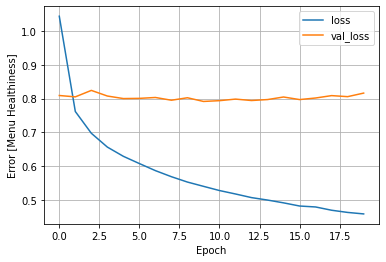

In [ ]:
plot_loss(model_1_history)

# Model 2: LSTM, character level 

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
model_2_embedding = layers.Embedding(input_dim = max_char_length, 
                                     output_dim=64,
                                     embeddings_initializer="uniform",
                                     input_length=max_length_char,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = char_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
#x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1)(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")
model_2.summary()

(None, 25, 64)
(None, 64)
Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_4 (TextV  (None, 25)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 25, 64)            3200      
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 36,289
Trainable params: 36,289
Non-trainable params: 0
________________________

In [ ]:
model_2.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005))

In [ ]:
model_2_history = model_2.fit(X_train_, y_train_, epochs=50, validation_data = (X_val, y_val))

Epoch 1/50
1382/1382 [==============================] - 20s 13ms/step - loss: 1.2162 - val_loss: 1.0971
Epoch 2/50
1382/1382 [==============================] - 17s 13ms/step - loss: 1.0367 - val_loss: 1.0024
Epoch 3/50
1382/1382 [==============================] - 18s 13ms/step - loss: 1.0071 - val_loss: 1.0590
Epoch 4/50
1382/1382 [==============================] - 18s 13ms/step - loss: 0.9921 - val_loss: 0.9751
Epoch 5/50
1382/1382 [==============================] - 18s 13ms/step - loss: 0.9770 - val_loss: 0.9649
Epoch 6/50
1382/1382 [==============================] - 18s 13ms/step - loss: 0.9649 - val_loss: 0.9525
Epoch 7/50
1382/1382 [==============================] - 18s 13ms/step - loss: 0.9517 - val_loss: 0.9411
Epoch 8/50
1382/1382 [==============================] - 18s 13ms/step - loss: 0.9369 - val_loss: 0.9282
Epoch 9/50
1382/1382 [==============================] - 18s 13ms/step - loss: 0.9254 - val_loss: 0.9235
Epoch 10/50
1382/1382 [==============================] - 18s 13m

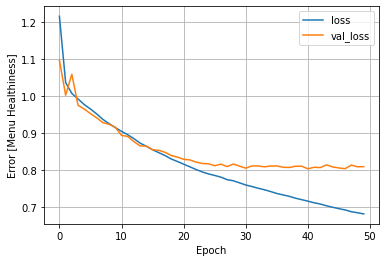

In [ ]:
plot_loss(model_2_history)

# Model 3: GRU, word level 
Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=64,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = word_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1)(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005))
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 10)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 10, 64)            1280000   
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,305,025
Trainable params: 1,305,025
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3_history = model_3.fit(X_train_, y_train_, epochs=20, validation_data = (X_val, y_val))

Epoch 1/20
1382/1382 [==============================] - 15s 9ms/step - loss: 1.0545 - val_loss: 0.8089
Epoch 2/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.7653 - val_loss: 0.8001
Epoch 3/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.7020 - val_loss: 0.7943
Epoch 4/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.6620 - val_loss: 0.8011
Epoch 5/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.6351 - val_loss: 0.8079
Epoch 6/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.6133 - val_loss: 0.8053
Epoch 7/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.5932 - val_loss: 0.7998
Epoch 8/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.5767 - val_loss: 0.8067
Epoch 9/20
1382/1382 [==============================] - 12s 9ms/step - loss: 0.5609 - val_loss: 0.7921
Epoch 10/20
1382/1382 [==============================] - 12s 9ms/step - l

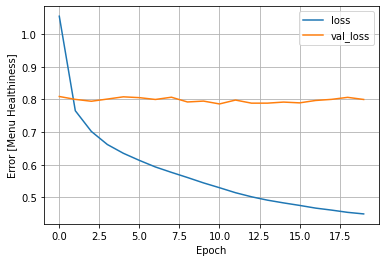

In [ ]:
plot_loss(model_3_history)

# Model 4: GRU, character level 

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_char_length,
                                     output_dim=64,
                                     embeddings_initializer="uniform",
                                     input_length=max_length_char,
                                     name="embedding_4")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = char_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(32)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_GRU")

In [ ]:
model_4.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005))
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_4 (TextV  (None, 25)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 25, 64)            3200      
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,641
Trainable params: 12,641
Non-trainable params: 0
___________________________________________________

In [ ]:
model_4_history = model_4.fit(X_train_, y_train_, epochs=20, validation_data = (X_val, y_val))

Epoch 1/20
1382/1382 [==============================] - 19s 12ms/step - loss: 1.3006 - val_loss: 1.0511
Epoch 2/20
1382/1382 [==============================] - 16s 12ms/step - loss: 1.0418 - val_loss: 1.0295
Epoch 3/20
1382/1382 [==============================] - 16s 12ms/step - loss: 1.0237 - val_loss: 1.0156
Epoch 4/20
1382/1382 [==============================] - 16s 12ms/step - loss: 1.0111 - val_loss: 1.0033
Epoch 5/20
1382/1382 [==============================] - 16s 12ms/step - loss: 1.0036 - val_loss: 0.9916
Epoch 6/20
1382/1382 [==============================] - 16s 12ms/step - loss: 0.9929 - val_loss: 0.9794
Epoch 7/20
1382/1382 [==============================] - 16s 12ms/step - loss: 0.9810 - val_loss: 0.9664
Epoch 8/20
1382/1382 [==============================] - 16s 12ms/step - loss: 0.9683 - val_loss: 0.9568
Epoch 9/20
1382/1382 [==============================] - 16s 12ms/step - loss: 0.9554 - val_loss: 0.9645
Epoch 10/20
1382/1382 [==============================] - 16s 12m

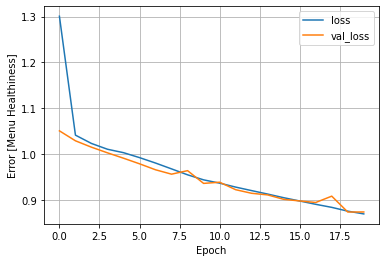

In [ ]:
plot_loss(model_4_history)

# Model 5: Convolutional Neural Network, word level tokenization

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=64,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = word_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")


In [ ]:
model_5.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005))
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 10)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 10, 64)            1280000   
                                                                 
 conv1d (Conv1D)             (None, 6, 32)             10272     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_16 (Dense)            (None, 1)              

In [ ]:
model_5_history = model_5.fit(X_train_, y_train_, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4813 - val_loss: 0.8015
Epoch 2/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4686 - val_loss: 0.8007
Epoch 3/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4540 - val_loss: 0.8027
Epoch 4/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4466 - val_loss: 0.8039
Epoch 5/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4369 - val_loss: 0.8055
Epoch 6/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4286 - val_loss: 0.8058
Epoch 7/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4219 - val_loss: 0.8082
Epoch 8/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4148 - val_loss: 0.8081
Epoch 9/10
1382/1382 [==============================] - 10s 7ms/step - loss: 0.4078 - val_loss: 0.8112
Epoch 10/10
1382/1382 [==============================] - 10s 7ms/step - l

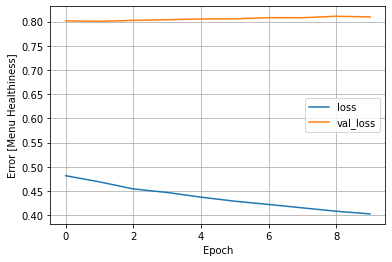

In [ ]:
plot_loss(model_5_history)

# Adding Hygiene Ratings

How to combine numeric and text inputs in deep learning models? 

> **Multiple input models**:  end-to-end model; what happens in such a model is that we basically stack two models on top of each other, but perserve the ability to train stimultaneously by the same target label.




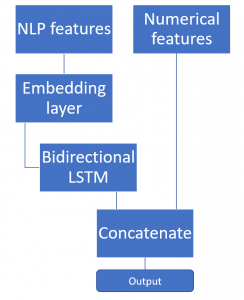






In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,Unnamed: 0,0
0,0,Pass
1,1,NaN
2,2,Pass
3,3,NaN
4,4,Improvement Required


In [ ]:
# How many of the restaurants have food hyginene rating? 
import collections
collections.Counter(ratings.iloc[:,1])

Counter({'0': 59,
         '1': 985,
         '2': 1209,
         '3': 6788,
         '4': 10075,
         '5': 23643,
         'Improvement Required': 306,
         'Pass': 2820,
         'Pass and Eat Safe': 9,
         nan: 8681})

In [ ]:
justeat_menu['hyginene'] = ratings.iloc[:,1]

In [ ]:
# focus on England only: restaurants with hyginene ratings
justeat_hr = justeat_menu[justeat_menu['hyginene'].notnull()]
justeat_eng = justeat_hr[justeat_hr['hyginene'].str.contains('0|1|2|3|4|5')]
justeat_eng['hg_rating'] = justeat_eng.hyginene.astype("float64")
justeat_eng['rest_name'] = justeat_eng.rest_name.astype("string")
justeat_eng.hg_rating.dtypes, justeat_eng.item_price_median.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(dtype('float64'), dtype('float64'))

In [ ]:
# Train test split 

# Use train_test_split to split training data into training and test sets
train_data, test_data, train_label, test_label = train_test_split(justeat_eng[["rest_name",'hg_rating']],
                                                                            justeat_eng["predict"],
                                                                            test_size=0.1, # dedicate 10% of samples to test set
                                                                            random_state=42) # random state for repr

In [ ]:
# Train validation Split 
X_train_hr, X_val_hr, y_train_hr, y_val_hr = train_test_split(train_data,train_label,test_size=0.1, random_state=42)

# Model 6: GRU, word level, add food hygiene rating

In [ ]:
#import tensorflow as tf
#from tensorflow.keras import layers
nlp_input = tf.keras.Input(shape=(10,), name='nlp_input')
#nlp_token = word_vectorizer(nlp_input)
hygiene_input = tf.keras.Input(shape=(1,), name='hygiene_input')
#hygiene_out = layers.Dense(64, activation = 'relu')(hygiene_input)
emb = layers.Embedding(output_dim=64, input_dim=max_vocab_length, input_length=max_length)(nlp_input)
nlp_out = layers.GRU(64)(emb)
x = tf.concat([nlp_out, hygiene_input],1)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(1)(x)
model_6 = tf.keras.Model(inputs=[nlp_input , hygiene_input], outputs=[x])

In [ ]:
model_6.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.0005,epsilon= 1e-6))

model_6.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nlp_input (InputLayer)         [(None, 10)]         0           []                               
                                                                                                  
 embedding_11 (Embedding)       (None, 10, 64)       1280000     ['nlp_input[0][0]']              
                                                                                                  
 gru_11 (GRU)                   (None, 64)           24960       ['embedding_11[0][0]']           
                                                                                                  
 hygiene_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                           

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
# Setup text vectorization with custom variables
max_vocab_length=20000
max_length = 10 # max length our sequences will be (e.g. how many words from the restaurant name does our model see?)

word_vectorizer = TextVectorization(output_mode="int",
                                    max_tokens = max_vocab_length,
                                    split = "whitespace",
                                    standardize ="lower_and_strip_punctuation",
                                    output_sequence_length=max_length)
word_vectorizer.adapt(X_train_hr['rest_name'])

In [ ]:
X_train_hr_name = word_vectorizer(tf.convert_to_tensor(X_train_hr['rest_name'].values))
print(X_train_hr_name.shape)

X_val_hr_name = word_vectorizer(tf.convert_to_tensor(X_val_hr['rest_name'].values))
print(X_val_hr_name.shape)

FailedPreconditionError: ignored

In [ ]:
X_train_hr_hr = X_train_hr['hg_rating'].values
print(X_train_hr_hr.shape)

X_val_hr_hr = X_val_hr['hg_rating'].values
print(X_val_hr_hr.shape)

(34634,)
(3849,)


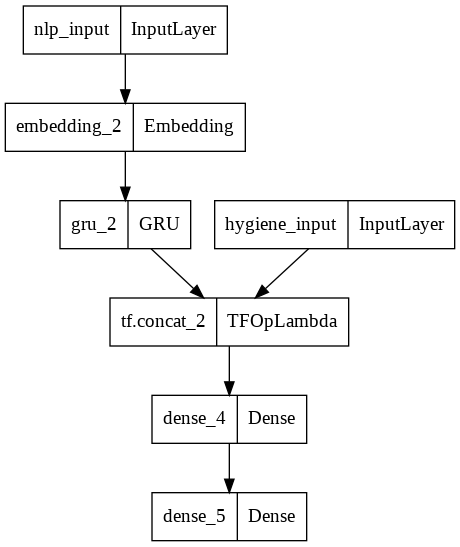

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_6)

In [ ]:
model_6_history = model_6.fit([X_train_hr_name,X_train_hr_hr], y_train_hr, epochs=10,
                              validation_data = ([X_val_hr_name,X_val_hr_hr], y_val_hr))

Epoch 1/10
1083/1083 [==============================] - 11s 9ms/step - loss: 1.0541 - val_loss: 0.8388
Epoch 2/10
1083/1083 [==============================] - 8s 8ms/step - loss: 0.7528 - val_loss: 0.8081
Epoch 3/10
1083/1083 [==============================] - 9s 8ms/step - loss: 0.6813 - val_loss: 0.8454
Epoch 4/10
1083/1083 [==============================] - 9s 8ms/step - loss: 0.6361 - val_loss: 0.8080
Epoch 5/10
1083/1083 [==============================] - 8s 8ms/step - loss: 0.6019 - val_loss: 0.8101
Epoch 6/10
1083/1083 [==============================] - 9s 8ms/step - loss: 0.5790 - val_loss: 0.7932
Epoch 7/10
1083/1083 [==============================] - 9s 8ms/step - loss: 0.5624 - val_loss: 0.7952
Epoch 8/10
1083/1083 [==============================] - 9s 8ms/step - loss: 0.5415 - val_loss: 0.7789
Epoch 9/10
1083/1083 [==============================] - 9s 8ms/step - loss: 0.5233 - val_loss: 0.7751
Epoch 10/10
1083/1083 [==============================] - 8s 8ms/step - loss: 0.50

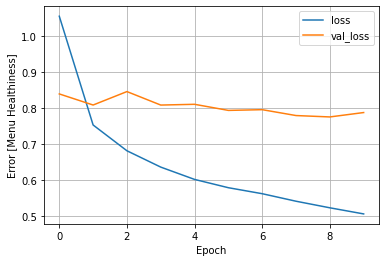

In [ ]:
plot_loss(model_6_history)

# Model 7: GRU, character level, add food hygiene rating

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

nlp_input = tf.keras.Input(shape=(25,), name='nlp_input')
#nlp_token = word_vectorizer(nlp_input)
hygiene_input = tf.keras.Input(shape=(1,), name='hygiene_input')
#hygiene_out = layers.Dense(64, activation = 'relu')(hygiene_input)
emb = layers.Embedding(output_dim=64, input_dim=max_char_length, input_length=max_length_char)(nlp_input)
nlp_out = layers.GRU(64)(emb)
x = tf.concat([nlp_out, hygiene_input],1)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(1)(x)
model_7 = tf.keras.Model(inputs=[nlp_input , hygiene_input], outputs=[x])

In [ ]:
# set up character level tokenization
from tensorflow.keras.layers import TextVectorization
max_length_char = 25 # max length our sequences will be (e.g. how many characters from the restaurant name does our model see?)
max_char_length = 50

def char_split(input_data):
  return(tf.strings.unicode_split(input_data,'UTF-8'))

char_vectorizer = TextVectorization(max_tokens = max_char_length, 
                                    output_mode="int",
                                    split = char_split,
                                    standardize ="lower_and_strip_punctuation",
                                    output_sequence_length=max_length_char)

In [ ]:
char_vectorizer.adapt(X_train_hr['rest_name'])

X_train_hr_name_char = char_vectorizer(tf.convert_to_tensor(X_train_hr['rest_name'].values))
print(X_train_hr_name_char.shape)

X_val_hr_name_char = char_vectorizer(tf.convert_to_tensor(X_val_hr['rest_name'].values))
print(X_val_hr_name_char.shape)

(34634, 25)
(3849, 25)


In [ ]:
model_7.compile(loss="mean_squared_error",
                optimizer=tf.keras.optimizers.Adam(0.0005,epsilon= 1e-6),
                metrics = ['mae','mean_absolute_percentage_error'])

model_7.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nlp_input (InputLayer)         [(None, 25)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 25, 64)       3200        ['nlp_input[0][0]']              
                                                                                                  
 gru (GRU)                      (None, 64)           24960       ['embedding[0][0]']              
                                                                                                  
 hygiene_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                              

In [ ]:
model_7_history = model_7.fit([X_train_hr_name_char,X_train_hr.hg_rating], y_train_hr, epochs=20,
                              validation_data = ([X_val_hr_name_char,X_val_hr.hg_rating], y_val_hr))

Epoch 1/20
1083/1083 [==============================] - 11s 10ms/step - loss: 1.1950 - mae: 0.8141 - mean_absolute_percentage_error: 16.6380 - val_loss: 1.3022 - val_mae: 0.8445 - val_mean_absolute_percentage_error: 17.8599
Epoch 2/20
1083/1083 [==============================] - 11s 10ms/step - loss: 1.1804 - mae: 0.8079 - mean_absolute_percentage_error: 16.4673 - val_loss: 1.2937 - val_mae: 0.8377 - val_mean_absolute_percentage_error: 17.6360
Epoch 3/20
1083/1083 [==============================] - 11s 10ms/step - loss: 1.1642 - mae: 0.8019 - mean_absolute_percentage_error: 16.2804 - val_loss: 1.2832 - val_mae: 0.8310 - val_mean_absolute_percentage_error: 17.5787
Epoch 4/20
1083/1083 [==============================] - 11s 10ms/step - loss: 1.1455 - mae: 0.7955 - mean_absolute_percentage_error: 16.1820 - val_loss: 1.2551 - val_mae: 0.8229 - val_mean_absolute_percentage_error: 16.7137
Epoch 5/20
1083/1083 [==============================] - 11s 10ms/step - loss: 1.1291 - mae: 0.7899 - mea

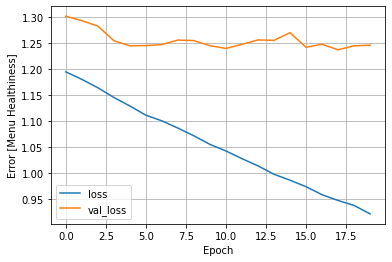

In [ ]:
plot_loss(model_7_history)

# Model 8: GRU, character level, add food hygiene rating, change activation function

In [ ]:
# Using Tanh instead of Relu 
nlp_input = tf.keras.Input(shape=(25,), name='nlp_input')
#nlp_token = word_vectorizer(nlp_input)
hygiene_input = tf.keras.Input(shape=(1,), name='hygiene_input')
#hygiene_out = layers.Dense(64, activation = 'relu')(hygiene_input)
emb = layers.Embedding(output_dim=64, input_dim=max_vocab_length, input_length=max_length)(nlp_input)
nlp_out = layers.GRU(64)(emb)
x = tf.concat([nlp_out, hygiene_input],1)
x = layers.Dense(64, activation='tanh')(x)
x = layers.Dense(1)(x)
model_8 = tf.keras.Model(inputs=[nlp_input , hygiene_input], outputs=[x])

In [ ]:
model_8.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam())


In [ ]:
model_8_history = model_8.fit([X_train_hr_name_char,X_train_hr_hr], y_train_hr, epochs=20,
                              validation_data = ([X_val_hr_name_char,X_val_hr_hr], y_val_hr))

Epoch 1/20
1083/1083 [==============================] - 14s 11ms/step - loss: 1.1647 - val_loss: 1.0304
Epoch 2/20
1083/1083 [==============================] - 11s 10ms/step - loss: 0.9960 - val_loss: 0.9726
Epoch 3/20
1083/1083 [==============================] - 11s 10ms/step - loss: 0.9472 - val_loss: 0.9547
Epoch 4/20
1083/1083 [==============================] - 11s 10ms/step - loss: 0.9188 - val_loss: 0.9118
Epoch 5/20
1083/1083 [==============================] - 11s 11ms/step - loss: 0.8984 - val_loss: 0.9011
Epoch 6/20
1083/1083 [==============================] - 13s 12ms/step - loss: 0.8802 - val_loss: 0.8908
Epoch 7/20
1083/1083 [==============================] - 11s 10ms/step - loss: 0.8620 - val_loss: 0.8618
Epoch 8/20
1083/1083 [==============================] - 11s 10ms/step - loss: 0.8474 - val_loss: 0.8543
Epoch 9/20
1083/1083 [==============================] - 11s 10ms/step - loss: 0.8322 - val_loss: 0.8386
Epoch 10/20
1083/1083 [==============================] - 11s 10m

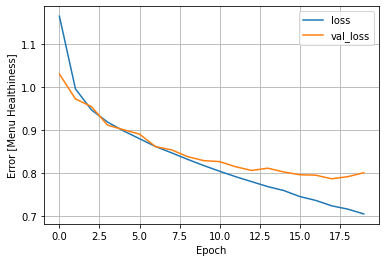

In [ ]:
plot_loss(model_8_history)